<HR>

#### Dimensionality Reduction using T-SNE

<HR>

##### How does TSNE work?

1. It creates a similarity matrix for all data points using a scaled normal distribution
2. It then replicates this matrix for a lower dimensional subspace to minimize the divigergence of joint probabilities between reproduction of clusters in lower subspace to that in the original feaure space

**Advantages:**

1. Particularly useful for visualization
2. Can identify clusters with complex swiss role types of shapes and varying density

**Disadvantages**

1. Non-convexity of cost function optimization
2. Complex manifolds-euclidean distance usage cannot account for complex local structures

<HR>
    
It is generally recommended to first PCA transform the dataset if features (p) are too many and then use T-SNE upon that dataset for optimal computation. Since, we already have PCA transformed features on our dataset we will use this for visualizing Fraud and Normal transaction in 2 dimensions to see if we can identify any clustering pattern using T-SNE.



In [1]:
import dill
dill.load_session('notebook_env.db')

In [2]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [3]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

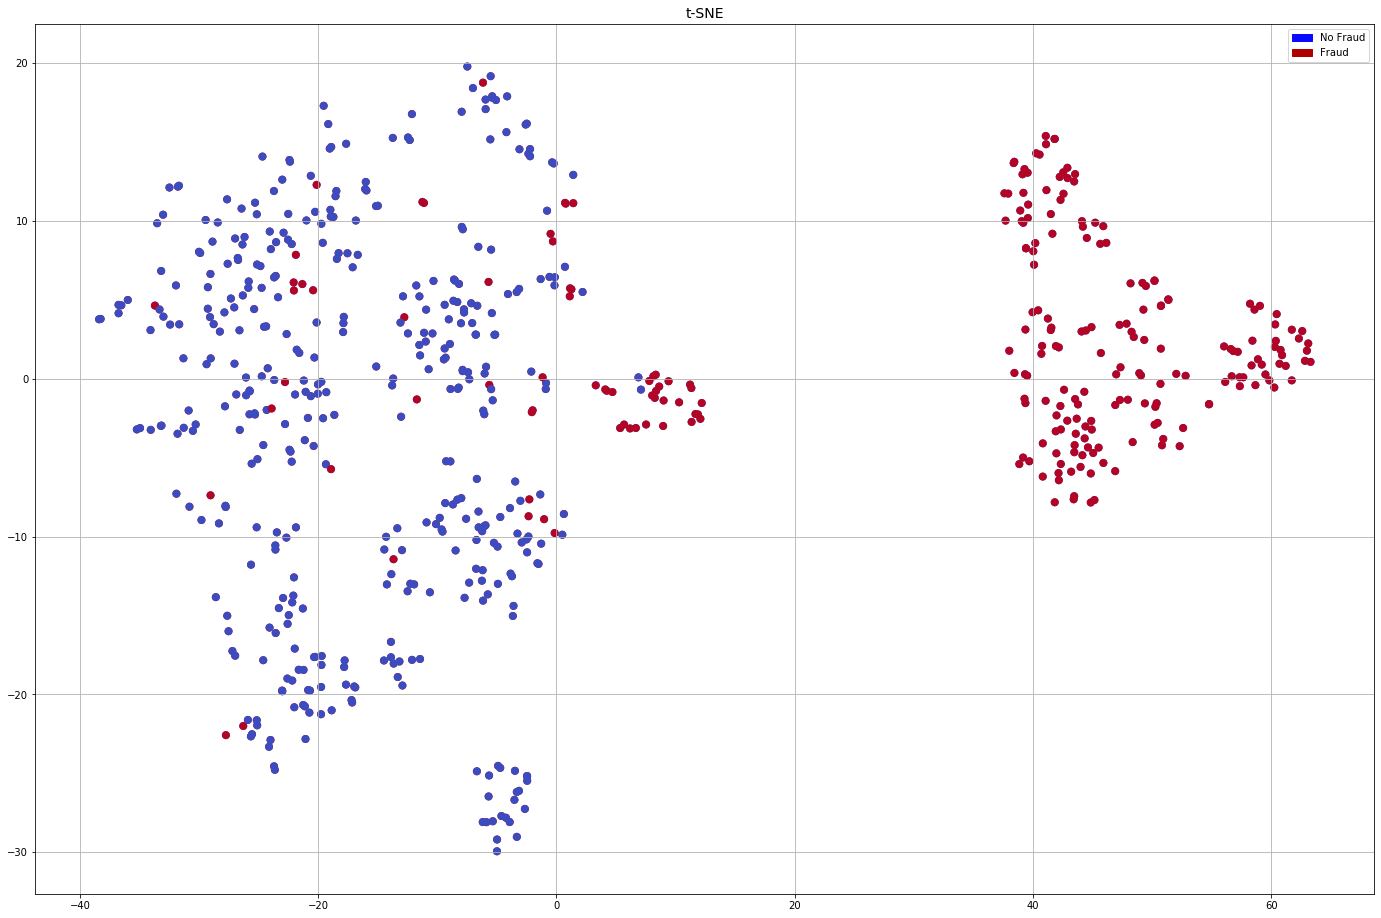

In [4]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])
